In [32]:
%load_ext autoreload
%autoreload 3
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [180]:
import numpy as np

from FutureEventList import FutureEventList
from Customer import Customer
from Server import Server
from QueueEvents import QueueEvents, ARRIVAL, DEPARTURE
from Monitor import Monitor


def sample_interrival_time():
    return np.random.uniform(1, 20)

def sample_service_time():
    return np.random.uniform(1, 10)

In [181]:
MAX_TIME_TO_SIMULATE = 24 * 60 * 30
event_list = FutureEventList()
first_arrival_time = sample_interrival_time()
current_time = 0
next_arrival = current_time + first_arrival_time
first_arrival = QueueEvents(first_arrival_time, ARRIVAL)
event_list.enqueue(first_arrival)
customers = []
curr_customer = 0
num_in_queue = 0
num_in_system = 0
server = Server()
monitor = Monitor()
num_in_system_list = []
time_list = []
num_in_queue_list = []

In [182]:
while current_time < MAX_TIME_TO_SIMULATE:
    next_event = event_list.dequeue()
    current_time = next_event.get_time()
    if next_event.event_type == ARRIVAL:
        num_in_system += 1
        num_in_queue += 1
        
        next_arrival_time = current_time + sample_interrival_time()
        next_arrival_event = QueueEvents(next_arrival_time, ARRIVAL)
        event_list.enqueue(next_arrival_event)
            
        service_time = sample_service_time()
        new_customer = Customer(current_time, service_time)
        customers.append(new_customer)
       
        if server.is_free():
            server.start_service(customers[curr_customer], current_time)
            departure_time = service_time + current_time
            departure_event = QueueEvents(departure_time, DEPARTURE)
            event_list.enqueue(departure_event)
            num_in_queue -= 1
            
    elif next_event.event_type == DEPARTURE:
        
        num_in_system -= 1
        customers[curr_customer].service_finish = current_time
        server.finish_serve(current_time)
        curr_customer += 1
        
        if num_in_queue > 0 and server.is_free():
            server.start_service(customers[curr_customer], current_time)
            departure_time = customers[curr_customer].service_time + current_time
            departure_event = QueueEvents(departure_time, DEPARTURE)
            event_list.enqueue(departure_event)
            num_in_queue -= 1
    time_list.append(current_time)
    num_in_system_list.append(num_in_system)
    num_in_queue_list.append(num_in_queue)
    

print(server.time_active)
print(server.compute_utilization(MAX_TIME_TO_SIMULATE))




23888.146458473286
0.5529663532054001


In [183]:
len(customers)

4118

In [184]:
import matplotlib.pylab as pylab

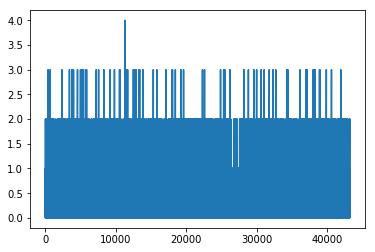

In [185]:
pylab.plot(time_list, num_in_system_list)

In [179]:
time_spent_in_system = []
for customer in customers:
    time_spent = customer.service_finish - customer.arrival_time
    if time_spent < 0: break
    time_spent_in_system.append(time_spent)
print(np.mean(time_spent_in_system))

5.435149760140128
